In [1]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

from math import isnan
from sklearn.preprocessing import  LabelEncoder

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

train_set = "train.csv"
train_df = pd.read_csv(train_set)
NaNs_data_df =  train_df.isnull().sum().sort_values(ascending=False)
#print(NaNs_data_df)

train_df["Age"] = train_df["Age"].fillna(train_df["Age"].mean())
train_df["Cabin"] = train_df["Cabin"].fillna('U')
train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])

train_df['Sex'] = train_df['Sex'].map({'female':0,'male':1})

train_df = pd.get_dummies(train_df,columns=["Embarked"])

#print(train_df['Cabin'])

deck_set = train_df["Cabin"].str[0]
#print(deck_set)

train_df['Cabin'] = deck_set
#print(train_df['Cabin'].describe())

unique_list = list(train_df.Cabin.unique())
mapping = {item: unique_list.index(item) for item in unique_list}
train_df['Cabin'] = train_df['Cabin'].map(mapping)
#print(train_df.head(10))


corr_df = train_df.drop(['PassengerId'], axis = 1)
corr_df['Family'] = corr_df.Parch + corr_df.SibSp
corr_df['Is_Alone'] = corr_df.Family == 0
corr_df['Fare_Category'] = pd.cut(corr_df['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid',                                                                                   'High_Mid','High'])
corr_df['Age_group'] = pd.cut(corr_df['Age'], bins=[0,10,20,40,60,80,100],
                              labels=['0-10','10-20', '20-40', '40-60','60-80','80-100'])
corr_df['Title'] = train_df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())



corr_df.drop([ 'Fare'], axis=1, inplace=True)
corr_df.drop([ 'SibSp', ], axis=1, inplace=True)
corr_df.drop([ 'Parch'], axis=1, inplace=True)
corr_df.drop([ 'Name'], axis=1, inplace=True)
corr_df.drop([ 'Ticket'], axis=1, inplace=True)


corr_df['Is_Alone']=corr_df['Is_Alone'].map({False:0,True:1})
corr_df['Title'] = LabelEncoder().fit_transform(corr_df['Title'])
corr_df['Fare_Category'] = LabelEncoder().fit_transform(corr_df['Fare_Category'])
labels=['0-10','10-20', '20-40', '40-60','60-80','80-100']
mapping ={}
for label in labels:
    temp = corr_df[corr_df['Age_group']==label]
    mea = temp.Age.mean()
    if isnan(mea):
        mea = 0
    mapping[label] = mea
#print(mapping)
corr_df['Age_group'] = corr_df['Age_group'].map(mapping)


corr_df = pd.get_dummies(corr_df,columns=["Title","Cabin"])
#print(corr_df)
Y = corr_df["Survived"]
X = corr_df.drop(['Survived'],axis = 1 )
print(corr_df.Age_group.describe())
print(X.Age_group.describe())
cols = X.columns

count     891.000000
unique      5.000000
top        29.425701
freq      562.000000
Name: Age_group, dtype: float64
count     891.000000
unique      5.000000
top        29.425701
freq      562.000000
Name: Age_group, dtype: float64


count    891.000000
mean      29.699118
std       12.238985
min        4.268281
25%       29.425701
50%       29.425701
75%       29.425701
max       66.022727
Name: Age_group, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         891 non-null    int64  
 1   Sex            891 non-null    int64  
 2   Age            891 non-null    float64
 3   Embarked_C     891 non-null    uint8  
 4   Embarked_Q     891 non-null    uint8  
 5   Embarked_S     891 non-null    uint8  
 6   Family         891 non-null    int64  
 7   Is_Alone       891 non-null    int64  
 8   Fare_Category  891 non-null    int32  
 9   Age_group      891 non-null    float64
 10  Title_0        891 non-null    uint8  
 11  Title_1        891 non-null    uint8  
 12  Title_2        891 non-null    uint8  
 13  Title_3        891 non-null    uint8  

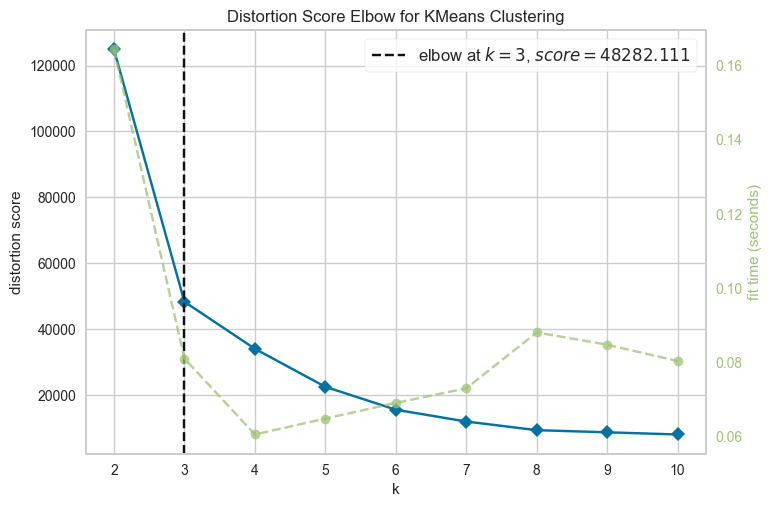

C:\Users\nrk_pavilion\PycharmProjects\data_mining_2023\venv\lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\nrk_pavilion\PycharmProjects\data_mining_2023\venv\lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


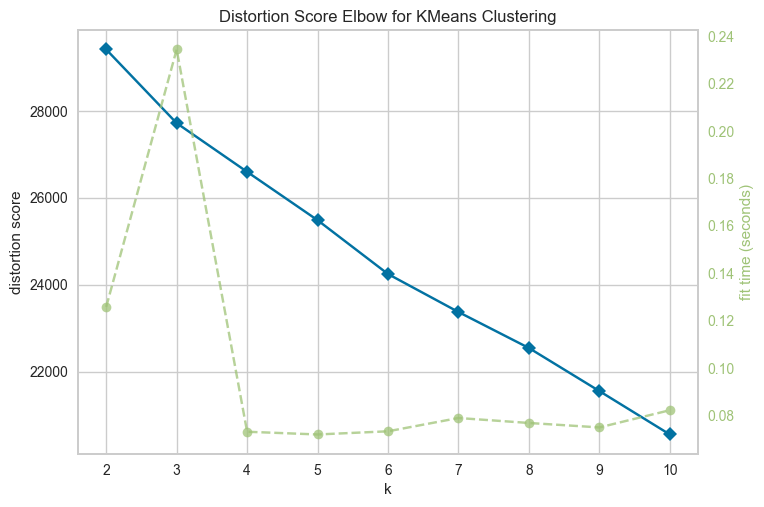

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [2]:
X['Age_group'] =X["Age_group"].astype(dtype="float64")
print(X.Age_group.describe())
print(X.info())
print(Y)

kmeans = KMeans(n_init=10)
sil_vis = KElbowVisualizer(kmeans,numeric_only=None)
sil_vis.fit(X)
sil_vis.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_init=10)
sil_vis = KElbowVisualizer(kmeans,numeric_only=None)
sil_vis.fit(X_scaled)
sil_vis.show()

In [3]:
kmeans = KMeans(n_clusters=3,n_init=10)
kmeans.fit(X)
X['Cluster'] = kmeans.labels_

In [4]:
print(X.head())

   Pclass  Sex   Age  Embarked_C  Embarked_Q  Embarked_S  Family  Is_Alone  \
0       3    1  22.0           0           0           1       1         0   
1       1    0  38.0           1           0           0       1         0   
2       3    0  26.0           0           0           1       0         1   
3       1    0  35.0           0           0           1       1         0   
4       3    1  35.0           0           0           1       0         1   

   Fare_Category  Age_group  ...  Cabin_0  Cabin_1  Cabin_2  Cabin_3  Cabin_4  \
0              2  29.425701  ...        1        0        0        0        0   
1              0  29.425701  ...        0        1        0        0        0   
2              3  29.425701  ...        1        0        0        0        0   
3              0  29.425701  ...        0        1        0        0        0   
4              3  29.425701  ...        1        0        0        0        0   

   Cabin_5  Cabin_6  Cabin_7  Cabin_8  Clust

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


def select_classifier(option):
    if option == 1:
        classifier = KNeighborsClassifier(p=1, n_neighbors=3)
    elif option == 2:
        classifier = SVC(kernel="linear", C=0.001, random_state=42)
    elif option == 3:
        classifier = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
    elif option == 4:
        classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
    elif option == 5:
        classifier = MLPClassifier(max_iter=10000, activation='logistic', random_state=42)
    elif option == 6:
        classifier = AdaBoostClassifier(n_estimators=200, random_state=42)
    elif option == 7:
        classifier = GaussianNB()
    else:
        raise ValueError("option values are : 1,2,3,4,5,6,7,8")
    return classifier


def run_classification(X, Y, classifier=1):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    #training
    model = select_classifier(classifier)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    #print("---------------------------------------------------------------------")
    print(
        f"Classifier {classifier} yeilds training accuracy of {model.score(X_train, y_train)}\n with a testing accuracy of {accuracy_score(y_test, predictions)}")
    return classifier, model.score(X_train, y_train), accuracy_score(y_test, predictions)

In [6]:
models = ["k-NN", "SVM", "Dec Tree","R Forest", "N_Net",
          "AdaBoost", "Naive Bayes"]
models_train_acc = []
models_test_acc = []
models_train_acc_s = []
models_test_acc_s = []
for model in models:
    print(f"----------------Classifier {model}----------------------")
    option = models.index(model)+1
    classifier, train_acc, test_acc = run_classification(X,Y,option)
    models_train_acc.append(train_acc)
    models_test_acc.append(test_acc)
    print(f"-------------------Scaled {model}-------------------------")
    classifier, train_acc, test_acc = run_classification(X_scaled,Y,option)
    models_train_acc_s.append(train_acc)
    models_test_acc_s.append(test_acc)


----------------Classifier k-NN----------------------
Classifier 1 yeilds training accuracy of 0.8731942215088283
 with a testing accuracy of 0.7873134328358209
-------------------Scaled k-NN-------------------------
Classifier 1 yeilds training accuracy of 0.8828250401284109
 with a testing accuracy of 0.8059701492537313
----------------Classifier SVM----------------------
Classifier 2 yeilds training accuracy of 0.6292134831460674
 with a testing accuracy of 0.585820895522388
-------------------Scaled SVM-------------------------
Classifier 2 yeilds training accuracy of 0.8025682182985554
 with a testing accuracy of 0.8134328358208955
----------------Classifier Dec Tree----------------------
Classifier 3 yeilds training accuracy of 0.8282504012841091
 with a testing accuracy of 0.8022388059701493
-------------------Scaled Dec Tree-------------------------
Classifier 3 yeilds training accuracy of 0.8282504012841091
 with a testing accuracy of 0.8022388059701493
----------------Classif

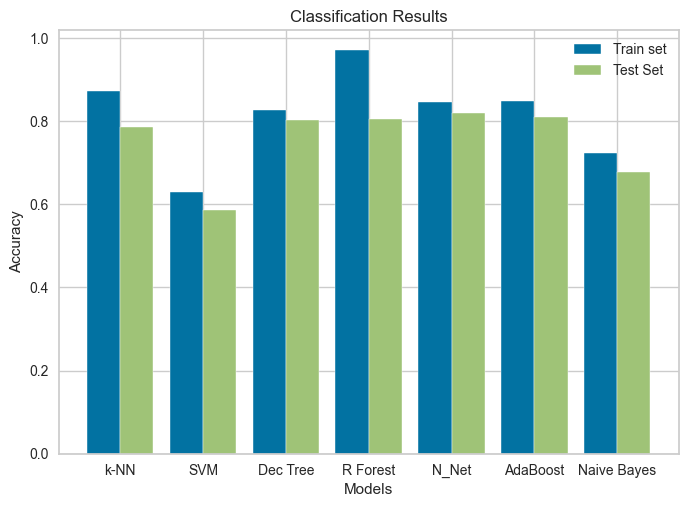

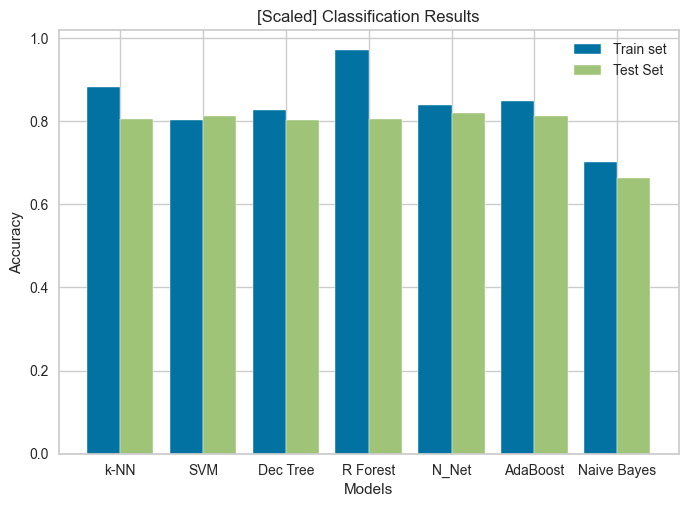

In [7]:
import numpy as np

fig = plt.figure("Classification Results")
x_axis = np.arange(len(models))
plt.bar(x_axis-0.2,models_train_acc,0.4,label = "Train set")
plt.bar(x_axis+0.2,models_test_acc,0.4,label = 'Test Set')
plt.xticks(x_axis,models)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Classification Results")
plt.show()
fig = plt.figure("[Scaled] Classification Results")
x_axis = np.arange(len(models))
plt.bar(x_axis-0.2,models_train_acc_s,0.4,label = "Train set")
plt.bar(x_axis+0.2,models_test_acc_s,0.4,label = 'Test Set')
plt.xticks(x_axis,models)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("[Scaled] Classification Results")

plt.legend()
plt.show()

In [8]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

estimators = [i for i in range(10,210,10)]
depth = [i for i in range(1,24,4)]
params = {"n_estimators":estimators,
          "max_depth":depth}
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=42)
random_forest = RandomForestClassifier(criterion='entropy', random_state=42)
random_forest = GridSearchCV(random_forest,params,scoring='accuracy',n_jobs=4)
random_forest.fit(X_train,y_train)

print(f"Best Parameters: {random_forest.best_params_}")
print(f"Best mean cv accuracy: {random_forest.best_score_}")

y = random_forest.best_estimator_.predict(X_test)
print(f'Accuracy after GridSearch: {accuracy_score(y_test, y)}')

Best Parameters: {'max_depth': 9, 'n_estimators': 200}
Best mean cv accuracy: 0.8363096774193549
Accuracy after GridSearch: 0.8134328358208955
CPU times: total: 469 ms
Wall time: 38.3 s


In [9]:
%%time
#scaled data
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

estimators = [i for i in range(10,210,10)]
depth = [i for i in range(1,24,4)]
params = {"n_estimators":estimators,
          "max_depth":depth}
X_train, X_test, y_train, y_test = train_test_split( X_scaled, Y, test_size=0.3, random_state=42)
random_forest = RandomForestClassifier(criterion='entropy', random_state=42)
random_forest = GridSearchCV(random_forest,params,scoring='accuracy',n_jobs=4)
random_forest.fit(X_train,y_train)

print(f"Best Parameters: {random_forest.best_params_}")
print(f"Best mean cv accuracy: {random_forest.best_score_}")

y = random_forest.best_estimator_.predict(X_test)
print(f'Accuracy after GridSearch: {accuracy_score(y_test, y)}')

Best Parameters: {'max_depth': 9, 'n_estimators': 110}
Best mean cv accuracy: 0.8395354838709677
Accuracy after GridSearch: 0.8208955223880597
CPU times: total: 281 ms
Wall time: 29.5 s


In [10]:
X_train, X_test, y_train, y_test = train_test_split( X_scaled, Y, test_size=0.3, random_state=42)
random_forest = RandomForestClassifier(criterion='entropy', random_state=42)
random_forest.fit(X_train,y_train)
importances = random_forest.feature_importances_

imp1 = sorted([(i,j) for i,j in  zip(importances,cols)], reverse=True)
print("_____------Scaled-----__________")
for i,j in imp1:
    print(f"Feature: {j} -- Score {i}")

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=42)
random_forest = RandomForestClassifier(criterion='entropy', random_state=42)
random_forest.fit(X_train,y_train)
importances = random_forest.feature_importances_
imp2 = sorted([(i,j) for i,j in  zip(importances,X.columns)],reverse=True)
print("_____------Un Scaled-----__________")
for i,j in imp2:
    print(f"Feature: {j} -- Score {i}")

_____------Scaled-----__________
Feature: Age -- Score 0.26087264653357095
Feature: Sex -- Score 0.10063044861043437
Feature: Title_11 -- Score 0.09457692777076818
Feature: Fare_Category -- Score 0.08963392539316108
Feature: Pclass -- Score 0.0875109097287265
Feature: Family -- Score 0.08102512371306539
Feature: Age_group -- Score 0.05085638599924193
Feature: Cabin_0 -- Score 0.034937501362195485
Feature: Title_8 -- Score 0.0304874455083539
Feature: Title_12 -- Score 0.02821200837730438
Feature: Embarked_S -- Score 0.021330188415289584
Feature: Embarked_C -- Score 0.020783760323577184
Feature: Is_Alone -- Score 0.019864644024101707
Feature: Cabin_2 -- Score 0.013780010044547247
Feature: Cabin_6 -- Score 0.011470791383610783
Feature: Embarked_Q -- Score 0.010883631776511487
Feature: Cabin_1 -- Score 0.009424799046651595
Feature: Cabin_4 -- Score 0.007800671600352854
Feature: Title_7 -- Score 0.006355565286527059
Feature: Cabin_3 -- Score 0.0035321204907992633
Feature: Title_14 -- Score 